In [0]:
%tensorflow_version 2.x

In [51]:
 import tensorflow as tf
 print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


In [0]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [0]:
train_images = train_images/255.0

In [0]:
test_images = test_images/255.0

In [56]:
train_images.shape

(50000, 32, 32, 3)

In [57]:
test_images.shape

(10000, 32, 32, 3)

In [58]:
train_labels.shape

(50000, 1)

In [59]:
test_labels.shape

(10000, 1)

In [0]:
target_labels = ['airplane','automobile','bird','cat','deer','dog','frog',
'horse','ship','truck']

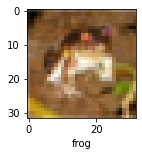

In [61]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0])
plt.xlabel(target_labels[train_labels[0][0]])
plt.show()

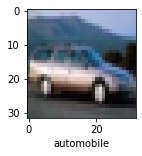

In [62]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[4])
plt.xlabel(target_labels[train_labels[4][0]])
plt.show()

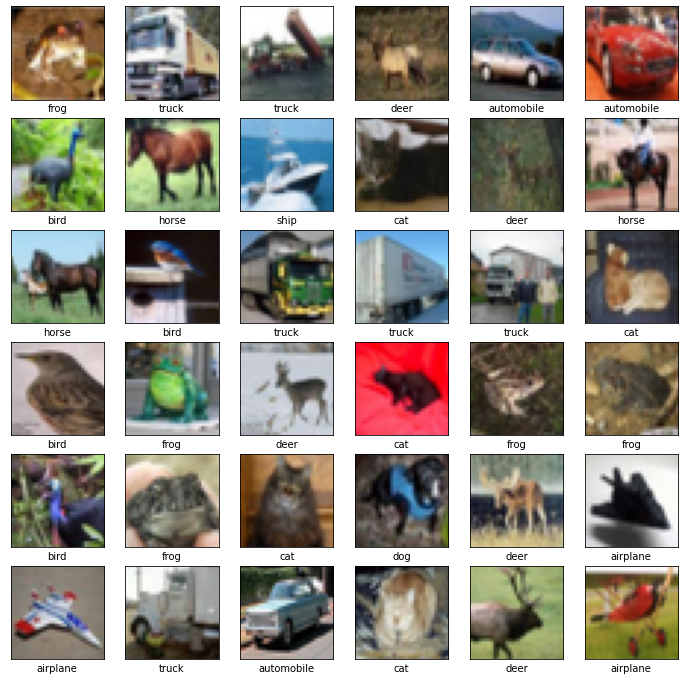

In [63]:
plt.figure(figsize=(12,12))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(target_labels[train_labels[i][0]])
plt.show()  


In [0]:
#layers
l0 = layers.Conv2D(64,(3,3) , activation='relu' , input_shape=(32,32,3))
l1 = layers.MaxPool2D(2,2)
l2 = layers.Conv2D(128,(3,3), activation='relu')
l3 = layers.MaxPool2D(2,2)
l4 = layers.Conv2D(128,(3,3) , activation='relu')

In [65]:
model = models.Sequential([l0,l1,l2,l3,l4])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         147584    
Total params: 223,232
Trainable params: 223,232
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
#compile model
model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy'
              , metrics =['accuracy'])

In [68]:
history = model.fit(train_images,train_labels, epochs=10,
                    validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 172s 3ms/sample - loss: 1.4611 - accuracy: 0.4678 - val_loss: 1.1793 - val_accuracy: 0.5851
Epoch 2/10
50000/50000 [==============================] - 172s 3ms/sample - loss: 1.0709 - accuracy: 0.6245 - val_loss: 1.0234 - val_accuracy: 0.6386
Epoch 3/10
50000/50000 [==============================] - 173s 3ms/sample - loss: 0.9097 - accuracy: 0.6819 - val_loss: 0.9182 - val_accuracy: 0.6819
Epoch 4/10
50000/50000 [==============================] - 172s 3ms/sample - loss: 0.8104 - accuracy: 0.7181 - val_loss: 0.8692 - val_accuracy: 0.7030
Epoch 5/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 0.7246 - accuracy: 0.7475 - val_loss: 0.8034 - val_accuracy: 0.7270
Epoch 6/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 0.6590 - accuracy: 0.7704 - val_loss: 0.8540 - val_accuracy: 0.7116
Epoch 7/10
50000/50000 [==========================

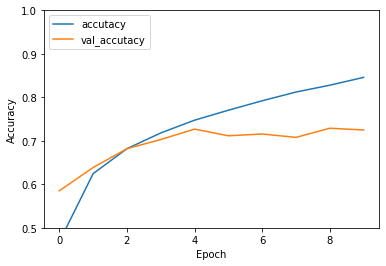

In [75]:
plt.plot(history.history['accuracy'], label='accutacy')
plt.plot(history.history['val_accuracy'], label='val_accutacy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper left')
plt.show()

In [76]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_acc)
print(test_loss)

10000/10000 [==============================] - 9s 864us/sample - loss: 0.8985 - accuracy: 0.7249
0.7249
0.8985444873809815
